[[0.   1.5  1.12 2.12 2.83 3.14 2.56]
 [1.5  0.   0.64 0.78 3.98 4.16 3.32]
 [1.12 0.64 0.   1.02 3.35 3.52 2.69]
 [2.12 0.78 1.02 0.   4.21 4.3  3.36]
 [2.83 3.98 3.35 4.21 0.   0.51 1.17]
 [3.14 4.16 3.52 4.3  0.51 0.   1.  ]
 [2.56 3.32 2.69 3.36 1.17 1.   0.  ]]


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [12.5, 12.5, 43.75, 43.75]],
 'dcoord': [[0.0, 0.5099019513592785, 0.5099019513592785, 0.0],
  [0.0, 1.004987562112089, 1.004987562112089, 0.5099019513592785],
  [0.0, 0.6403124237432848, 0.6403124237432848, 0.0],
  [0.0, 0.7810249675906653, 0.7810249675906653, 0.6403124237432848],
  [0.0, 1.118033988749895, 1.118033988749895, 0.7810249675906653],
  [1.004987562112089,
   2.563201123595259,
   2.563201123595259,
   1.118033988749895]],
 'ivl': [6, 4, 5, 0, 3, 1, 2],
 'leaves': [6, 4, 5, 0, 3, 1, 2],
 'color_list': ['C1', 'C1', 'C2', 'C2', 'C2', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C2']}

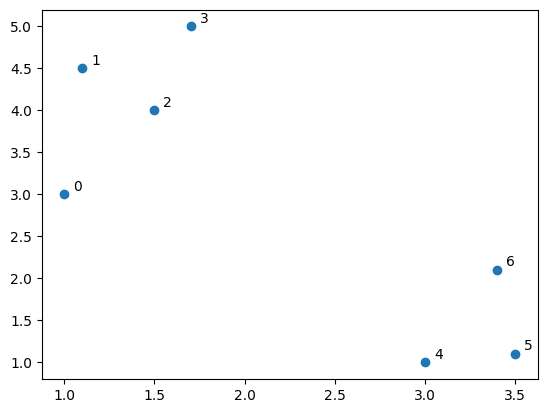

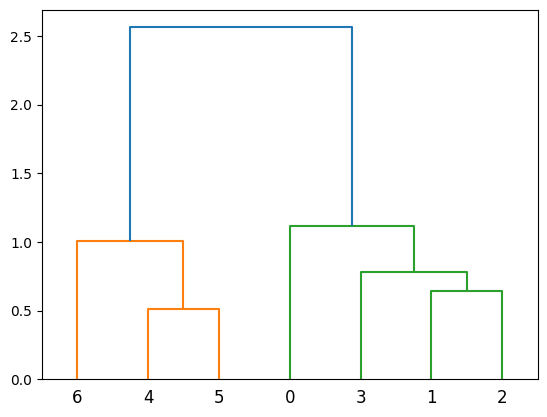

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

# Data set
x = np.array([[1,3],[1.1,4.5],
    [1.5,4],[1.7,5],[3,1],
    [3.5,1.1],[3.4,2.1]])

# Visualisation
plt.scatter(x[:,0],x[:,1])
for i in range(x.shape[0]):
    plt.text(x[i,0]+0.05, x[i,1]+0.05, str(i))

# Distance matrix
dm = distance_matrix(x,x)
print(np.round(dm,2))



# Dendrograms
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure()
dendrogram(linkage(x,'single'), labels=range(0,7))

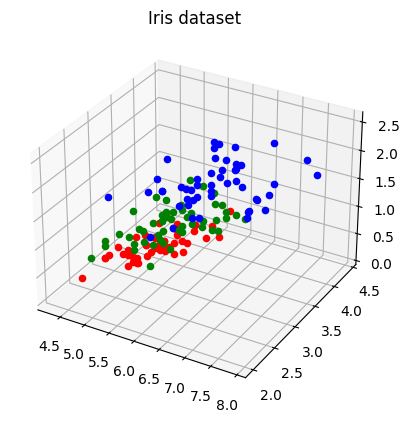

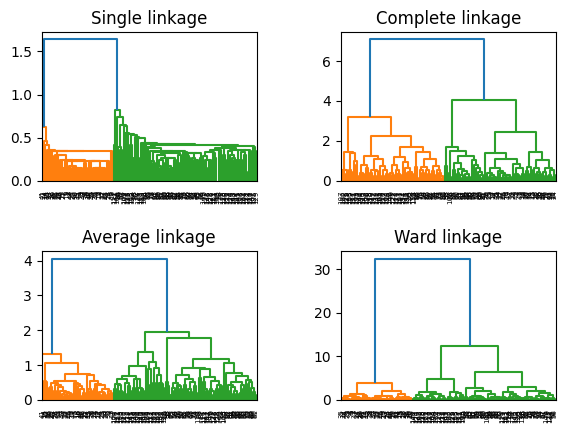

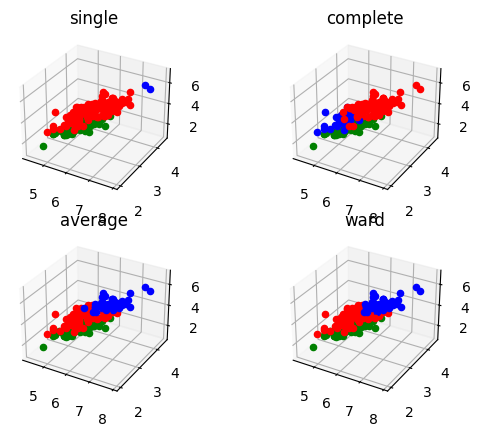

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #in order to do 3d plots
from sklearn import datasets

# Load the iris dataset
irisdata = datasets.load_iris()

# Get the iris data
x = irisdata.data
x_labs = irisdata.target
labels = np.unique(x_labs) #get unique labels

# Visualize in 3D
d = [0,1,3] #which dimensions to use

fig = plt.figure()
ax = plt.axes(projection ="3d")
ax.set_title('Iris dataset')

for i, j in enumerate(x_labs):
    if j==labels[0]:
        ax.scatter3D(x[i,d[0]],x[i,d[1]],x[i,d[2]], marker='o', color='red')
    elif j==labels[1]:
        ax.scatter3D(x[i,d[0]],x[i,d[1]],x[i,d[2]], marker='o', color='green')
    else:
        ax.scatter3D(x[i,d[0]],x[i,d[1]],x[i,d[2]], marker='o', color='blue')   


#-----------------------------------------------------------------------


# Generate the dendrogram (4 linkage methods)
from scipy.cluster.hierarchy import dendrogram, linkage

fig, axes = plt.subplots(2,2)
fig.tight_layout(pad=3.0)

dendrogram(linkage(x,'single'), ax=axes[0,0])
axes[0,0].set_title('Single linkage')

dendrogram(linkage(x,'complete'), ax=axes[0,1])
axes[0,1].set_title('Complete linkage')

dendrogram(linkage(x,'average'), ax=axes[1,0])
axes[1,0].set_title('Average linkage')

dendrogram(linkage(x,'ward'), ax=axes[1,1])
axes[1,1].set_title('Ward linkage')


#-----------------------------------------------------------------------


# Agglomerative clustering (4 linkage methods)
from sklearn.cluster import AgglomerativeClustering

k = 3
metric = 'euclidean'
linkage_criteria = ['single','complete','average','ward']
clustering_result = []

for i in linkage_criteria:
    myCluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage=i)
    clustering_result.append(myCluster.fit_predict(x))
    
    
# Visualize
fig = plt.figure()
fig.tight_layout(pad=3.0)
i_plt = 1    #subplot index
d = [0,1,2]  #which dimensions to use

for links in clustering_result:
    ax = fig.add_subplot(2, 2, i_plt, projection='3d')
    ax.set_title(linkage_criteria[i_plt-1])
    
    for i, j in enumerate(links):
        if j==labels[0]:
            ax.scatter3D(x[i,d[0]],x[i,d[1]],x[i,d[2]], marker='o', color='red')
        elif j==labels[1]:
            ax.scatter3D(x[i,d[0]],x[i,d[1]],x[i,d[2]], marker='o', color='green')
        else:
            ax.scatter3D(x[i,d[0]],x[i,d[1]],x[i,d[2]], marker='o', color='blue')   
        
    i_plt +=1

In [18]:
import pandas as pd

test = pd.read_csv('Data/test_titanic.csv')
train = pd.read_csv('Data/train_titanic.csv')

train['family']= train['SibSp'] + train['Parch']
test['family']= test['SibSp'] + test['Parch']
train['Alone'] = np.where(train['family']==0,1,0)
test['Alone'] = np.where(test['family']==0,1,0)
train['No_cabin'] = np.where(train['Cabin'].isna(),1,0)
test['No_cabin'] = np.where(test['Cabin'].isna(),1,0)
train['Gender'] = np.where(train['Sex']=="male",1,0)
test['Gender'] = np.where(test['Sex']=="male",1,0)
# filling gaps of age and fare with median
train[['Age', 'Fare']] = train[['Age', 'Fare']].fillna(train[['Age', 'Fare']].median())
test[['Age', 'Fare']] = test[['Age', 'Fare']].fillna(test[['Age', 'Fare']].median())
#test = test.dropna(axis=0, subset=['Age'])
#train = train.dropna(axis=0, subset=['Age'])

del train['SibSp']
del train['Parch']
del test['SibSp']
del test['Parch']
del test['family']
del train['family']
del train['PassengerId']
del test['PassengerId']
del train['Name']
del test['Name']

train['Age_Cat']=pd.cut(train.Age,bins=[0,2,17,65,99],labels=['Toddler/Baby','Child','Adult','Elderly'])
test['Age_Cat']=pd.cut(test.Age,bins=[0,2,17,65,99],labels=['Toddler/Baby','Child','Adult','Elderly'])

train['Age_Cat_num'] = train['Age_Cat'].replace(['Toddler/Baby','Child','Adult','Elderly'],
                        [1,2,3,4], inplace=False)

test['Age_Cat_num'] = test['Age_Cat'].replace(['Toddler/Baby','Child','Adult','Elderly'],
                        [1,2,3,4], inplace=False)

del train['Ticket']
del test['Ticket']
del train['Cabin']
del test['Cabin']
del train['Sex']
del test['Sex']
del train['Embarked']
del test['Embarked']

train['Age_Cat_num']=pd.to_numeric(train['Age_Cat_num'])
test['Age_Cat_num']=pd.to_numeric(test['Age_Cat_num'])

del train['Age_Cat']
del test['Age_Cat']
del train['Age']
del test['Age']
del train['Pclass']
del train['Alone']
del train['No_cabin']

In [14]:
irisdata

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [19]:

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Fare         891 non-null    float64
 2   Gender       891 non-null    int64  
 3   Age_Cat_num  891 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 28.0 KB


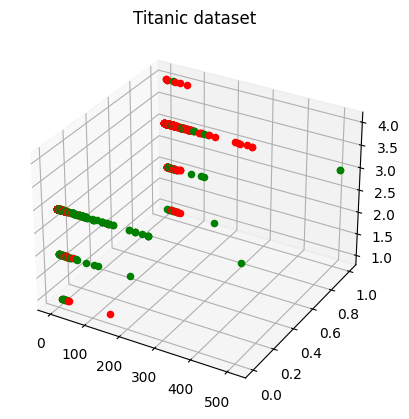

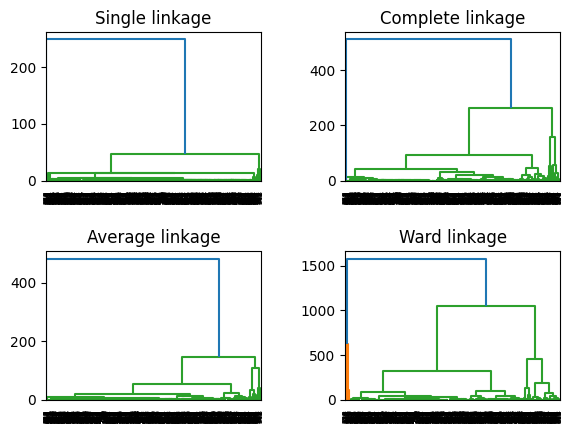

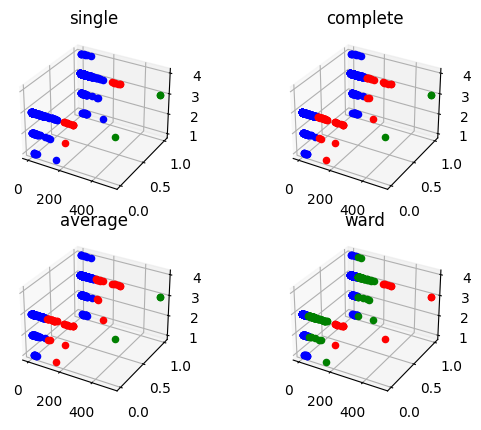

In [23]:
# try the same with the titanic dataset

# Load the iris dataset
#irisdata = datasets.load_iris(as_fram=True)


# Get the iris data
#x = irisdata.data
#x_labs = irisdata.target
x = train.iloc[:,1:4].values
x_labs = train.iloc[:,0].values
labels = np.unique(x_labs) #get unique labels

# Visualize in 3D
d = [0,1,2] #which dimensions to use

fig = plt.figure()
ax = plt.axes(projection ="3d")
ax.set_title('Titanic dataset')

for i, j in enumerate(x_labs):
    if j==labels[0]:
        ax.scatter3D(x[i,d[0]],x[i,d[1]],x[i,d[2]], marker='o', color='red')
    elif j==labels[1]:
        ax.scatter3D(x[i,d[0]],x[i,d[1]],x[i,d[2]], marker='o', color='green')
    else:
        ax.scatter3D(x[i,d[0]],x[i,d[1]],x[i,d[2]], marker='o', color='blue')   


#-----------------------------------------------------------------------


# Generate the dendrogram (4 linkage methods)
from scipy.cluster.hierarchy import dendrogram, linkage

fig, axes = plt.subplots(2,2)
fig.tight_layout(pad=3.0)

dendrogram(linkage(x,'single'), ax=axes[0,0])
axes[0,0].set_title('Single linkage')

dendrogram(linkage(x,'complete'), ax=axes[0,1])
axes[0,1].set_title('Complete linkage')

dendrogram(linkage(x,'average'), ax=axes[1,0])
axes[1,0].set_title('Average linkage')

dendrogram(linkage(x,'ward'), ax=axes[1,1])
axes[1,1].set_title('Ward linkage')


#-----------------------------------------------------------------------


# Agglomerative clustering (4 linkage methods)
from sklearn.cluster import AgglomerativeClustering

k = 3
metric = 'euclidean'
linkage_criteria = ['single','complete','average','ward']
clustering_result = []

for i in linkage_criteria:
    myCluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage=i)
    clustering_result.append(myCluster.fit_predict(x))
    
    
# Visualize
fig = plt.figure()
fig.tight_layout(pad=3.0)
i_plt = 1    #subplot index
d = [0,1,2]  #which dimensions to use

for links in clustering_result:
    ax = fig.add_subplot(2, 2, i_plt, projection='3d')
    ax.set_title(linkage_criteria[i_plt-1])
    
    for i, j in enumerate(links):
        if j==labels[0]:
            ax.scatter3D(x[i,d[0]],x[i,d[1]],x[i,d[2]], marker='o', color='red')
        elif j==labels[1]:
            ax.scatter3D(x[i,d[0]],x[i,d[1]],x[i,d[2]], marker='o', color='green')
        else:
            ax.scatter3D(x[i,d[0]],x[i,d[1]],x[i,d[2]], marker='o', color='blue')   
        
    i_plt +=1